In [5]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "7"

from collections import OrderedDict
import re
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
from tqdm.notebook import tqdm

from eval import get_run_metrics, read_run_dir, get_model_from_run
from plot_utils import basic_plot, collect_results, relevant_model_names

%matplotlib inline

%load_ext autoreload
%autoreload 2

sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

run_dir = "../models/periodic"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
df = read_run_dir(run_dir)
df # list all the runs in our run_dir

,run_id,task,model,kwargs,num_tasks,num_examples,n_dims,n_layer,n_head,run_name
2,1468ab06-745f-43e9-9795-77053ef5cabf,sum_sine_regression,Transformer,,-1,-1,20,12,8,fourier_sine_regression_standard
3,ef14b05a-d15a-4418-a47d-1ca6be3df829,linear_modulo_regression,Transformer,,-1,-1,20,12,8,linear_modulo_regression_standard
4,1643cdec-59ca-4f8e-ae37-1f9c73c31d8a,linear_sine_regression,Transformer,,-1,-1,20,12,8,linear_sine_regression_standard
0,b3d2bde5-95b7-4227-96b3-1cad688fec80,radial_sine_regression,Transformer,,-1,-1,20,12,8,radial_sine_regression_standard
6,8b1e67d2-cd30-4c7d-95fd-ce32a2e5e22e,saw_regression,Transformer,,-1,-1,20,12,8,saw_regression_standard
1,cb16b7e7-92c0-47fa-8a5b-40f9840f7e17,square_wave_regression,Transformer,,-1,-1,20,12,8,square_wave_regression_standard
5,9130cfcc-bc09-4887-ae64-2d0a869f8718,triangle_wave_regression,Transformer,,-1,-1,20,12,8,triangle_wave_regression_standard


In [6]:
# task = "linear_regression"
# task = "sparse_linear_regression"
# task = "decision_tree"
# task = "relu_2nn_regression"
# task = "linear_modulo_regression"
task = "sum_sine_regression"

run_id = df[df["task"] == task]["run_id"].iat[0]

run_path = os.path.join(run_dir, task, run_id)
recompute_metrics = True

if recompute_metrics:
    get_run_metrics(run_path, step=500_000)  # these are normally precomputed at the end of training

KeyError: 'fourier_sine_regression'

linear_modulo_regression_standard ef14b05a-d15a-4418-a47d-1ca6be3df829


100%|██████████| 1/1 [00:00<00:00, 3243.85it/s]


{'standard': {'gpt2_embd=256_layer=12_head=8': {'mean': [1.402273178100586, 0.18071141839027405, 0.1468854695558548, 0.1122397631406784, 0.1301683634519577, 0.11312993615865707, 0.11791690438985825, 0.10616123676300049, 0.09607330709695816, 0.1132163554430008, 0.10090166330337524, 0.1141129732131958, 0.08930620551109314, 0.1026373878121376, 0.10077265650033951, 0.1014476865530014, 0.09808273613452911, 0.09754855930805206, 0.10005287826061249, 0.09215517342090607, 0.10028745979070663, 0.09769026935100555, 0.10559868812561035, 0.11038658767938614, 0.0995870977640152, 0.10521437972784042, 0.09394233673810959, 0.09860255569219589, 0.09933948516845703, 0.10419492423534393, 0.09823133051395416, 0.08896724134683609, 0.09477151930332184, 0.09231538325548172, 0.09331788867712021, 0.09099410474300385, 0.10900278389453888, 0.08423744142055511, 0.09939531981945038, 0.1106085553765297, 0.09143165498971939], 'std': [2.4391000270843506, 0.8105398416519165, 0.5473025441169739, 0.37308695912361145, 0.5

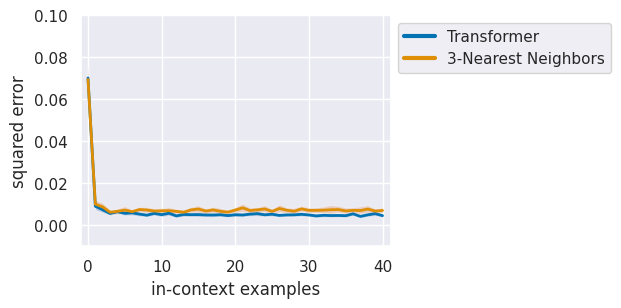

In [69]:
def valid_row(r),     return r.task == task and r.run_id == run_id

metrics = collect_results(run_dir, df, valid_row=valid_row, step=500_000)
_, conf = get_model_from_run(run_path, only_conf=True)
n_dims = conf.model.n_dims

models = relevant_model_names[task]
fig, ax = basic_plot(metrics["standard"], models=models)
ax.set_ylim(-0.01, 0.1)
plt.show()

fourier_sine_regression_standard 1468ab06-745f-43e9-9795-77053ef5cabf


100%|██████████| 1/1 [00:00<00:00, 4928.68it/s]


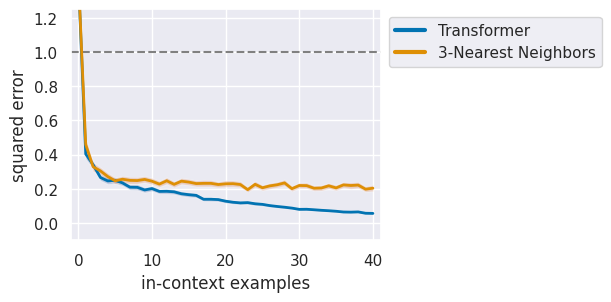

In [6]:
def valid_row(r):
    return r.task == task and r.run_id == run_id

metrics = collect_results(run_dir, df, valid_row=valid_row, step=500_000)
_, conf = get_model_from_run(run_path, only_conf=True)
n_dims = conf.model.n_dims

models = relevant_model_names[task]
fig, ax = basic_plot(metrics["standard"], models=models)
# ax.set_ylim(-0.01, 0.1)
plt.show()

100%|██████████| 1/1 [00:00<00:00, 4609.13it/s]


fourier_sine_regression_standard 1468ab06-745f-43e9-9795-77053ef5cabf


100%|██████████| 1/1 [00:00<00:00, 2868.88it/s]


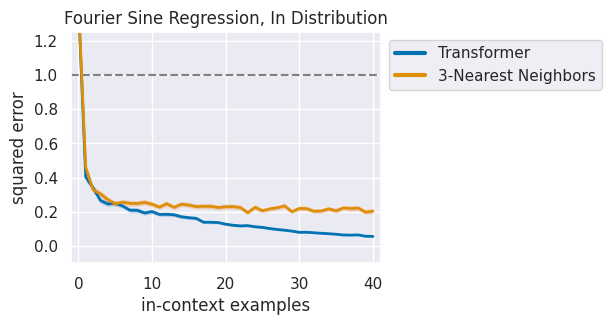

100%|██████████| 1/1 [00:00<00:00, 5809.29it/s]


radial_sine_regression_standard b3d2bde5-95b7-4227-96b3-1cad688fec80


100%|██████████| 1/1 [00:00<00:00, 4169.29it/s]


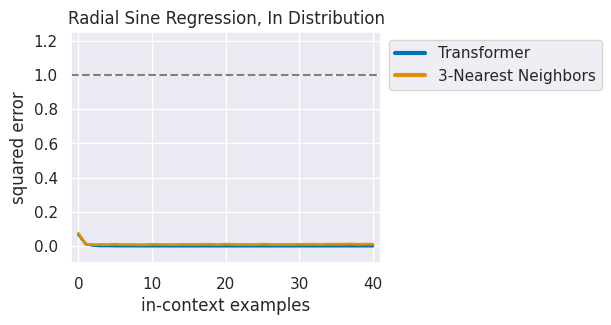

100%|██████████| 1/1 [00:00<00:00, 4240.95it/s]


linear_sine_regression_standard 1643cdec-59ca-4f8e-ae37-1f9c73c31d8a


100%|██████████| 1/1 [00:00<00:00, 3609.56it/s]


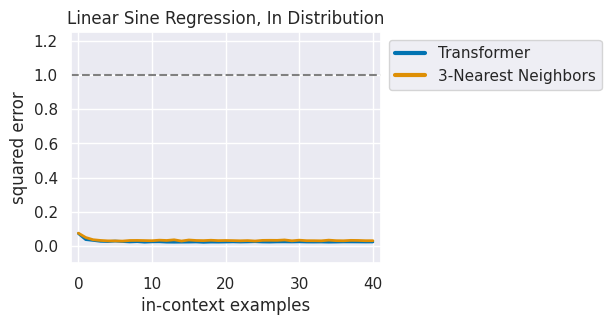

100%|██████████| 1/1 [00:00<00:00, 3515.76it/s]


linear_modulo_regression_standard ef14b05a-d15a-4418-a47d-1ca6be3df829


100%|██████████| 1/1 [00:00<00:00, 2968.37it/s]


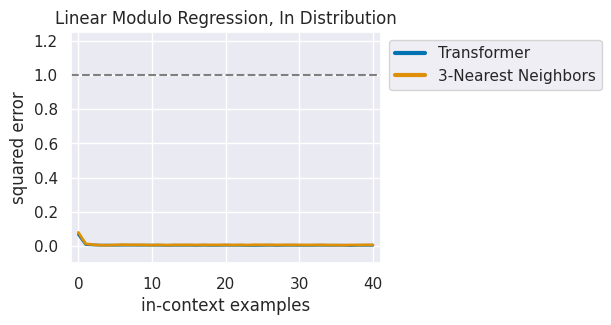

100%|██████████| 1/1 [00:00<00:00, 4788.02it/s]


saw_regression_standard 8b1e67d2-cd30-4c7d-95fd-ce32a2e5e22e


100%|██████████| 1/1 [00:00<00:00, 3942.02it/s]


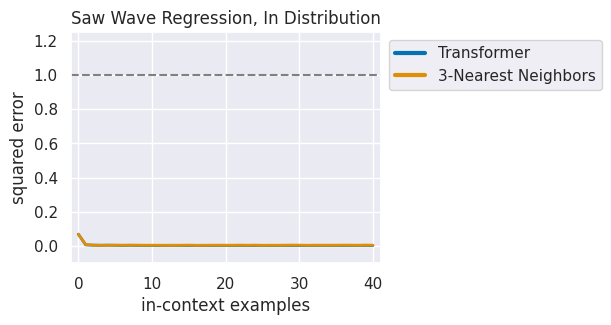

100%|██████████| 1/1 [00:00<00:00, 3015.32it/s]


square_wave_regression_standard cb16b7e7-92c0-47fa-8a5b-40f9840f7e17


100%|██████████| 1/1 [00:00<00:00, 3050.40it/s]


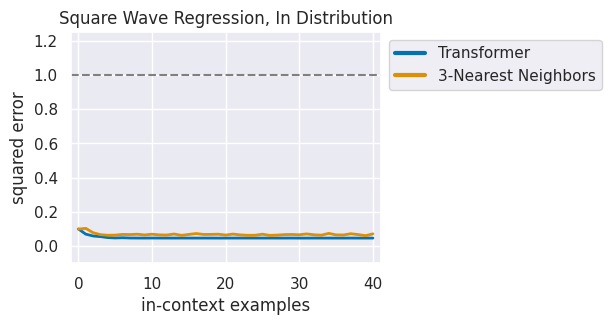

100%|██████████| 1/1 [00:00<00:00, 3313.04it/s]


triangle_wave_regression_standard 9130cfcc-bc09-4887-ae64-2d0a869f8718


100%|██████████| 1/1 [00:00<00:00, 3090.87it/s]


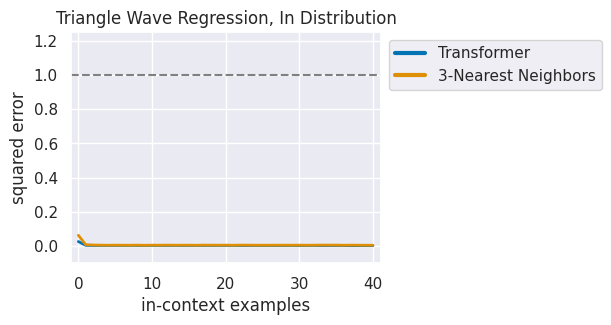

In [12]:
tasks = [
    "sum_sine_regression", 
    "radial_sine_regression", 
    "linear_sine_regression", 
    "linear_modulo_regression", 
    "saw_regression", 
    "square_wave_regression", 
    "triangle_wave_regression"
]

task_to_title = {
    "sum_sine_regression": "Sum Sine Regression", #TODO: Change to Sum of Sines Regression in paper and here
    "radial_sine_regression": "Radial Sine Regression",
    "linear_sine_regression": "Linear Sine Regression",
    "linear_modulo_regression": "Linear Modulo Regression",
    "saw_regression": "Saw Wave Regression",
    "square_wave_regression": "Square Wave Regression",
    "triangle_wave_regression": "Triangle Wave Regression",
}

for task in tasks:
    run_id = df[df["task"] == task]["run_id"].iat[0]

    run_path = os.path.join(run_dir, task, run_id)
    recompute_metrics = True

    if recompute_metrics:
        get_run_metrics(run_path, step=500_000)

    
    def valid_row(r):
        return r.task == task and r.run_id == run_id

    metrics = collect_results(run_dir, df, valid_row=valid_row, step=500_000)
    _, conf = get_model_from_run(run_path, only_conf=True)
    n_dims = conf.model.n_dims

    models = relevant_model_names[task]
    fig, ax = basic_plot(metrics["standard"], models=models)
    # ax.set_ylim(-0.01, 0.1)
    plt.title(task_to_title[task] + ", In Distribution")
    plt.show()